In [191]:
import numpy as np
import matplotlib.pyplot as plt
from pynamicalsys import ContinuousDynamicalSystem as cds, PlotStyler

In [192]:
ds = cds(model="duffing")

In [193]:
ds.info["equation"]

<IPython.core.display.Math object>

In [194]:
ds.info["parameters"]

['delta', 'alpha', 'beta', 'gamma', 'omega']

In [195]:
delta = 0.2
alpha = 1
beta = 1
gamma = 3
omega = 1.1
parameters = [delta, alpha, beta, gamma, omega]

In [196]:
T = 2 * np.pi / omega
t_over_T = 40
sample_time = t_over_T * T
transient_time = 100 * T
total_time = sample_time + transient_time
num_samples = 1000

In [197]:
num_ic = 100
x_range = (-5, 5)
v_range = (-5, 5)
np.random.seed(13)
x = np.random.uniform(*x_range, num_ic)
v = np.random.uniform(*v_range, num_ic)
u0 = np.zeros((num_ic, 2))
u0[:, 0] = x
u0[:, 1] = v

In [198]:
labels = ds.basin_of_attraction(u0, num_samples, parameters=parameters, transient_time=transient_time, sampling_time=T)

In [199]:
trajectories = ds.trajectory(u0, total_time, parameters=parameters, transient_time=transient_time)

<Figure size 640x480 with 0 Axes>

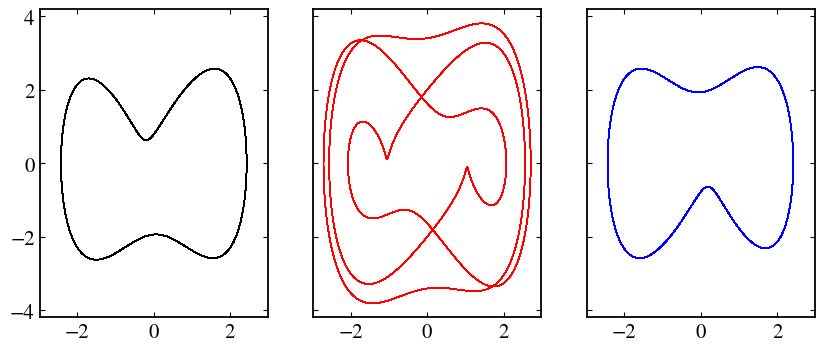

In [200]:
num_attractors = len(set(labels))
colors = "krbg"

ps = PlotStyler(fontsize=18, linewidth=0.7)
ps.apply_style()

fig, ax = plt.subplots(1, num_attractors, sharex=True, sharey=True, figsize=(10, 4))

for i in range(num_ic):
    ax[labels[i]].plot(trajectories[i][:, 1], trajectories[i][:, 2], c=colors[labels[i]])

In [201]:
grid_size = 100
x_range = (-5, 5)
v_range = (-5, 5)
x = np.linspace(*x_range, grid_size)
v = np.linspace(*v_range, grid_size)
x, v = np.meshgrid(x, v, indexing="ij")
u0 = np.zeros((grid_size, grid_size, 2))
u0[:, :, 0] = x
u0[:, :, 1] = v
u0 = u0.reshape(grid_size ** 2, 2)

In [202]:
u0.shape

(10000, 2)

In [203]:
labels = ds.basin_of_attraction(u0, num_samples, parameters=parameters, transient_time=transient_time, sampling_time=T, min_samples=1)

In [204]:
labels_grid = labels.reshape(grid_size, grid_size)

In [205]:
set(labels)

{np.int64(0), np.int64(1), np.int64(2)}

Text(0, 0.5, '$\\dot{x}$')

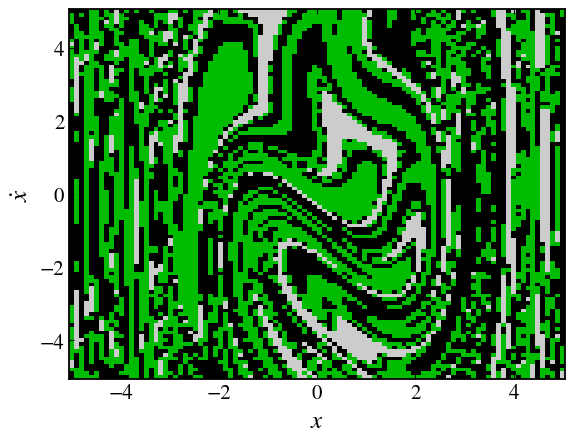

In [209]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

plt.pcolormesh(x, v, labels_grid, cmap="nipy_spectral", vmin=labels.min(), vmax=labels.max())
plt.xlabel("$x$")
plt.ylabel(r"$\dot{x}$")